## Introduction to Scikit-Learn (Python) Part 2 short

Agenda:

- Installation and a quick review of previous workshop
- Scikit-Learn datasets
- Unsupervised learning   Clustering algorithm (KMeans) and Dimensionality Reduction
- Scikit-Learn pipelines
- Kaggle competitions   
- Ensembling-Stacking

### The recommended installation is the Anaconda distribution.

- https://www.continuum.io/downloads


Resources:

- http://scikit-learn.org/stable/index.html

Book: **Introduction to Machine Learning with Python**   by Andreas C. Mueller , Sarah Guido

In [1]:
#check installed version 
import sys
print("Python version: {}".format(sys.version))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
scikit-learn version: 0.18.1


In [ ]:
## install sklearn  in cmd (anaconda)
#conda install sklearn
#pip install sklearn

## Scikit-Learn has a few well known datasets

http://scikit-learn.org/stable/datasets/index.html


- load_boston    (regression)
- load_iris    (classification)
- load_breast_cancer (classification)
- load_diabetes  (regression)
- load_digits (classification)
   
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs  (clustering)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
houses = load_boston()
houses.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
# print(houses.DESCR) #Boston House Prices dataset

In [6]:
print(houses.data.shape)
print(houses.target.shape)

(506, 13)
(506,)


In [7]:
X = houses.data
y = houses.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
print('Linear Regression Train/Test: %.3f/%.3f' %
      (linreg.score(X_train, y_train),
       linreg.score(X_test, y_test)))


Linear Regression Train/Test: 0.765/0.649


In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [9]:
print('Random Forest Train/Test: %.3f/%.3f' %
      (rf.score(X_train, y_train),
       rf.score(X_test, y_test)))

Random Forest Train/Test: 0.978/0.747


In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [14]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [15]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [17]:
iris = load_iris()
X = iris.data
y = iris.target


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
#print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))
print('Knn n=7 Train/Test: %.3f/%.3f' %
      (knn.score(X_train, y_train),
       knn.score(X_test, y_test)))

Knn n=7 Train/Test: 0.981/0.978


In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('Random Forest Train/Test: %.3f/%.3f' %
      (rf.score(X_train, y_train),
       rf.score(X_test, y_test)))

Random Forest Train/Test: 0.984/0.959


### Transformation  

#### Feature scaling

- Scaling      Standardization     centre at mean 0   std dev = 1

- Mix-Max scaling aka "normalisation"   between 0 and 1

In [ ]:
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split

#iris = load_iris()
#X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=123)

In [28]:
#scaling iris dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
#rescale data applying transform method
X_train_scaled = scaler.transform(X_train)

In [31]:
#scaled
print("mean : %s " % X_train_scaled.mean(axis=0))
print("standard deviation : %s " % X_train_scaled.std(axis=0))

mean : [ -4.80462231e-15   1.96668079e-15  -3.06633026e-16   1.92438658e-16] 
standard deviation : [ 1.  1.  1.  1.] 


In [32]:
# unscaled
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [ 5.86952381  3.05047619  3.83714286  1.23142857] 
standard deviation : [ 0.792239    0.40710916  1.70608196  0.73708748] 


In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [43]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [48]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## Unsupervised learning

### Clustering algorithms (KMeans)

Clustering is a task grouping together samples according to some predefined similarity or distance measure, such as the Euclidean distance.


In [6]:
# create dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=123)
X.shape

(100, 2)

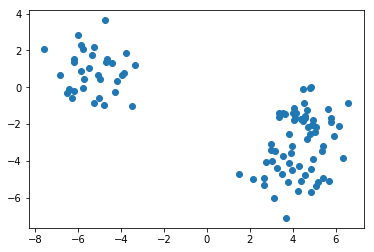

In [8]:
plt.scatter(X[:, 0], X[:, 1])

In [10]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=123)

In [11]:
labels = kmeans.fit_predict(X)

In [12]:

labels

array([2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2,
       0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0,
       0, 2, 2, 0, 1, 1, 2, 0])

In [13]:
np.all(y == labels)

False

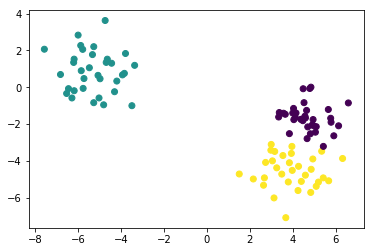

In [14]:

plt.scatter(X[:, 0], X[:, 1], c=labels);

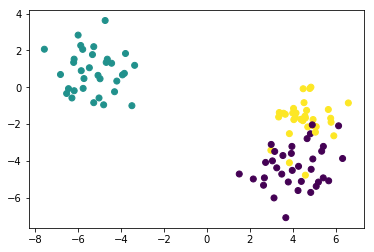

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [16]:
#scoring metric for clustering
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

0.78331262356995524

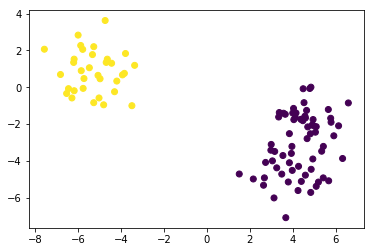

In [17]:
#
kmeans = KMeans(n_clusters=2, random_state=123)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

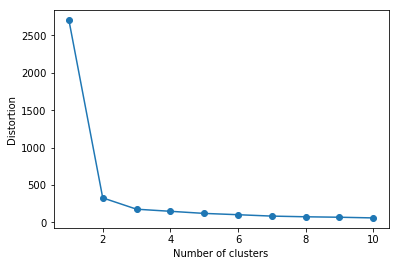

In [18]:
#Elbow method 

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

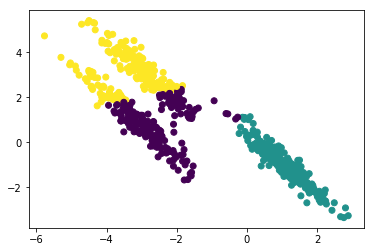

In [20]:

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [23]:

from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)

(10, 64)


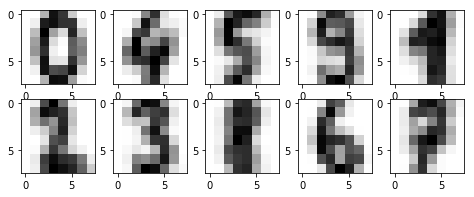

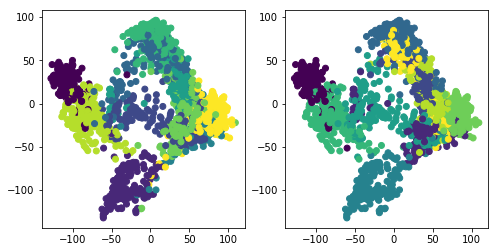

In [25]:
# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)

# visualize the projected data
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target)

### Dimensionality Reduction

Dimension reduction is the process of reducing the number of random variables under consideration, via obtaining a set of principal variables. It can be divided into feature selection and feature extraction.   https://en.wikipedia.org/wiki/Dimensionality_reduction

In [ ]:
https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction 
https://www.kaggle.com/c/digit-recognizer  


In [59]:
# Principal Component Analysis (PCA)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [60]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [56]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=123,
                                                    stratify=iris.target)

sc = StandardScaler()
sc.fit(X_train)
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(sc.transform(X_train))
X_test_pca = pca.transform(sc.transform(X_test))

In [ ]:
## Scikit-Learn Pipelines    

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html        

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

C:\Users\Roman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [67]:
#Without pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

svm = SVC().fit(X_train_scaled, y_train)


X_test_scaled  = scaler.transform(X_test)
svm.score(X_test_scaled, y_test)

0.98444444444444446

In [68]:
from sklearn.pipeline import Pipeline

# verbose constructor
pipe = Pipeline([("my_scaler", StandardScaler()), ("my_svm", SVC())])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.98444444444444446

In [70]:
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

cluster_pipe = make_pipeline(PCA(n_components=10), KMeans(n_clusters=10))
cluster_pipe.fit(X_train)
cluster_pipe.predict(X_train)

array([6, 8, 8, ..., 4, 4, 1])

In [71]:
cluster_pipe.named_steps['pca']

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [72]:
cluster_pipe.named_steps['pca'].components_.shape

(10, 64)

In [73]:
cluster_pipe.named_steps['kmeans']

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
cluster_pipe.named_steps['kmeans'].cluster_centers_.shape

(10, 10)

In [75]:
cluster_pipe = Pipeline([("my_pca",PCA(n_components=10)), ("my_clustering", KMeans(n_clusters=10))])
cluster_pipe.fit(X_train)

Pipeline(steps=[('my_pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('my_clustering', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [76]:
print(cluster_pipe.named_steps['my_pca'])
print(cluster_pipe.named_steps['my_clustering'])

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


## Kaggle
### https://www.kaggle.com/competitions

### https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python